In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt  

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/kaggle/hw_trained_net.h5')

In [ ]:
# word segmentation

def get_words(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  kernel = np.ones((5,30), np.uint8)
  
  ret,thresh1 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
  dilated = cv2.dilate(thresh1, kernel, iterations=2)
  
  ctrs = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  ctrs = imutils.grab_contours(ctrs)
  
  sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
  
  words = []
  
  for i, ctr in enumerate(sorted_ctrs):
    x, y, w, h = cv2.boundingRect(ctr)

    if(h >= 25 and h <= 500) and (w >= 55 and w <= 1080):
      roi = image[y:y+h, x:x+w]
      words.append(roi)
      cv2.rectangle(image,(x,y),( x + w, y + h ),(90,0,255),2)
      
  return words, image

In [ ]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
   
    return (cnts, boundingBoxes)

In [ ]:
import imutils

#character segmentation
def get_letters(img):

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    kernel = np.ones((4,4), np.uint8)
    ret,thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

    dilated = cv2.dilate(thresh1, kernel, iterations=2)
    
    
    cnts = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    cnts = sort_contours(cnts, method="left-to-right")[0]
    #cnts = sorted(cnts, key=lambda ctr: cv2.boundingRect(ctr)[0])

    letters = []
  
    for c in cnts:
      (x, y, w, h) = cv2.boundingRect(c)         
      cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
      if (w >= 25 and h >=25):
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
         
        thresh = cv2.resize(thresh, (28, 28), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(-1,28,28,1)
      
        ypred = model.predict(thresh)
        [x] = ypred
        letters.append(x)
    
    return letters, img

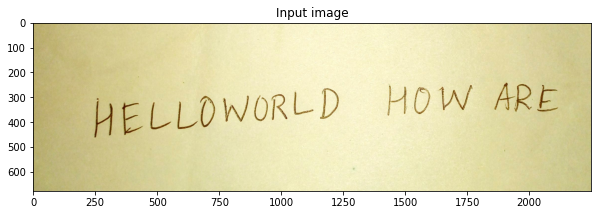

In [ ]:
inp_img = cv2.imread('/content/drive/MyDrive/testing1.jpg')
plt.figure(figsize=(10,10))
plt.imshow(inp_img)
plt.title("Input image")
plt.show()

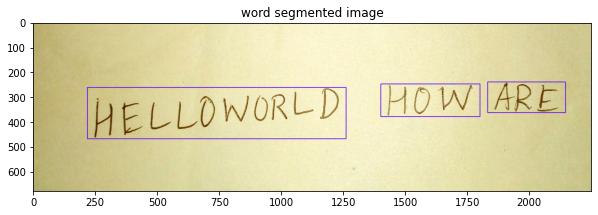

In [ ]:
words, wimg = get_words(inp_img)

plt.figure(figsize=(10,10))
plt.imshow(wimg)
plt.title("word segmented image")
plt.show()

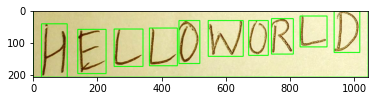

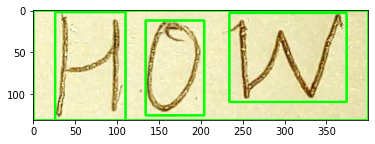

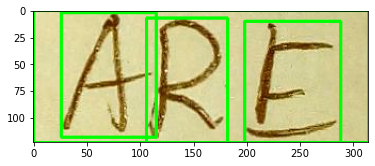

In [ ]:
labels = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
lst = [l for l in labels]

wlist = []
for w in words:
  letters, im2 = get_letters(w)
  plt.imshow(im2)
  plt.show()
  ltrs = ""
  for lt in letters:
    ltrs += lst[np.argmax(lt)]
  
  #print(ltrs, end=" ")
  wlist.append(ltrs)

In [ ]:
for ypred in wlist:
  print(ypred, end=" ")

HZLLOWURLD HOW ARE 